# DS105/305    Lab 2    Find the key

# You may work in pairs on this lab

In this lab, we'll use data from lib2data.csv
Begin by loading it into a Pandas dataframe

In [ ]:
# this starts pandas
import pandas as pd 

In [ ]:
#From Pandas specifically look at Series and DataFrames
from pandas import Series, DataFrame 

In [ ]:
#From textbook github repo, general entry and read in of potentially relevant packages
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

In [ ]:
# Load the data into a Dataframe
lab_2 = pd.read_csv('lab2data.csv')
lab_2_df = pd.DataFrame(lab_2, columns = list('ABCDE')) #use this trick for lists

Have a look at the data; you should see 5 columns labeled A,B,C,D,E

In [ ]:
# Put code for that here; add more cells if you like
print(lab_2_df)

            A         B    C    D    E
0   -1.440283 -0.842986  0.0  1.0  1.0
1   -2.090039  2.891875  1.0  0.0  1.0
2   -1.837887  2.605242  0.0  0.0  0.0
3   -0.863028  1.932187  1.0  0.0  0.0
4   -0.079581  2.454974  0.0  0.0  0.0
..        ...       ...  ...  ...  ...
195  1.448666  2.499497  1.0  1.0  0.0
196 -0.331588  0.124187  0.0  1.0  1.0
197 -0.082194  1.276768  0.0  1.0  0.0
198 -0.168140  1.132269  1.0  1.0  1.0
199 -0.456497  0.946727  1.0  1.0  1.0

[200 rows x 5 columns]


Make a scatter plot (use plt.scatter()) of columns A and B

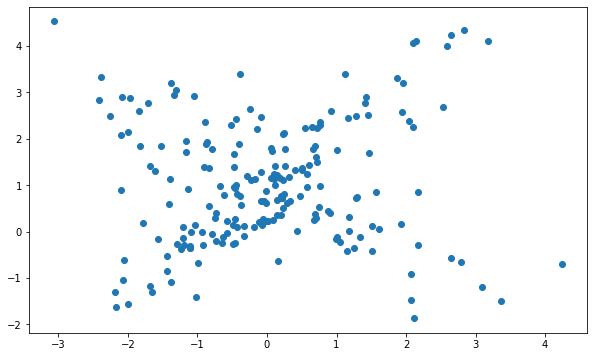

In [ ]:
# Scatter Plot between A and B
plt.scatter(lab_2_df.A, lab_2_df.B)

Find the correlation between columns A and B - it's pretty low

In [ ]:
# Correlation between A and B
lab_2_df.A.corr(lab_2_df.B)

0.0833464190206202

It turns out that columns A and B are actually from two different distributions and each of these distributions is quite highly correlated.  One of the other three columns is the key to separating the two distributions!  Your job is to find out which column that is.  In the cells below, do whatever you think works to determine which column is the key.  Your code should convince me that you didn't just guess or hear someone say the answer :-).

In [ ]:
# To start let's look at correlations across the dataframe and see if we can find anything unusual
#The only thing that's different and potentially useful is the sign of E for A and B is different
#However, as we will see later this is ultimately a red herring
lab_2_df.corr()

,A,B,C,D,E
A,1.000000,0.083346,0.046699,-0.015215,0.013114
B,0.083346,1.000000,0.003180,-0.029154,-0.058480
C,0.046699,0.003180,1.000000,0.010005,-0.080973
D,-0.015215,-0.029154,0.010005,1.000000,0.070032
E,0.013114,-0.058480,-0.080973,0.070032,1.000000


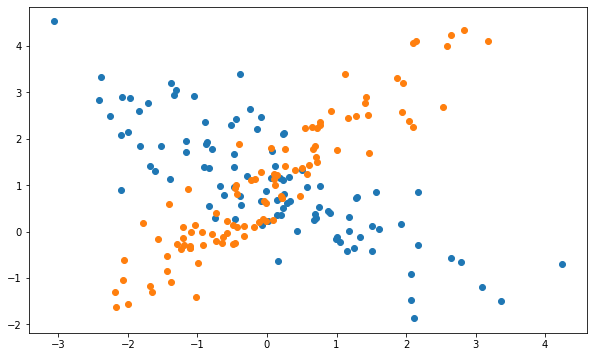

In [ ]:
#Since C, D, and E are binary 
#The key should be able to seperate A and B by the set of values at 0

#Below is the result after identifying D as the only one that exhibits a correlation 
# This clearly seperates the two datasets into a strong positive and negative correlation

lab_3 = lab_2_df.loc[lab_2_df.D == 0] #if you want to test others swap D for C or E
lab_4 = lab_2_df.loc[lab_2_df.D > 0] 

#Plotting the new seperated A and B
plt.scatter(lab_3.A, lab_3.B)
plt.scatter(lab_4.A, lab_4.B)


Report the correlation of the two distributions if they're considered separately.

In [ ]:
# Correlation between A and B in the dataset at 0 is -0.803395
lab_3.corr()



,A,B,C,D,E
A,1.000000,-0.803395,0.054434,NaN,0.086417
B,-0.803395,1.000000,-0.090031,NaN,-0.054776
C,0.054434,-0.090031,1.000000,NaN,-0.024140
D,NaN,NaN,NaN,NaN,NaN
E,0.086417,-0.054776,-0.024140,NaN,1.000000


In [ ]:
# Correlation between A and B in the dataset at 1 is 0.92877
lab_4.corr()

,A,B,C,D,E
A,1.000000,0.928777,0.038515,NaN,-0.066636
B,0.928777,1.000000,0.082585,NaN,-0.058482
C,0.038515,0.082585,1.000000,NaN,-0.139339
D,NaN,NaN,NaN,NaN,NaN
E,-0.066636,-0.058482,-0.139339,NaN,1.000000


Submit your notebook (you don't need to include the data file) to kebasye@clarku.edu by Wed., Feb. 23 at 11:59PM.